In [109]:
from pymongo import MongoClient
from bson import ObjectId
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

Conexão com o MongoDB

In [110]:
client = MongoClient("mongodb://127.0.0.1:27017")
db = client["sales-dataset"]
collection_name = "sales"
collection = db.get_collection(collection_name)

 Nome do arquivo JSON na raiz

In [111]:
export_file = "sales_data.json"

Ler CSV

In [112]:
df = pd.read_csv("sales-dataset.csv")

Exibir Dados do CSV

In [113]:
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08


Apaga dados Antigo se Existir

In [114]:
collection.delete_many({})

DeleteResult({'n': 1200, 'ok': 1.0}, acknowledged=True)

Inserir 5 Documentos Extras Manualmente

In [115]:
extras = [
    {"Order ID": "B-30001", "Amount": 2000, "Profit": 500, "Quantity": 3, "Category": "Clothing", "Sub-Category": "Shirts", "PaymentMode": "Credit Card", "Order Date": "2023-06-15", "CustomerName": "Ana Silva", "State": "Texas", "City": "Houston", "Year-Month": "2023-06"},
    {"Order ID": "B-30002", "Amount": 4500, "Profit": 900, "Quantity": 7, "Category": "Electronics", "Sub-Category": "Phones", "PaymentMode": "Cash", "Order Date": "2023-07-10", "CustomerName": "João Pedro", "State": "California", "City": "Los Angeles", "Year-Month": "2023-07"},
    {"Order ID": "B-30003", "Amount": 1500, "Profit": 300, "Quantity": 2, "Category": "Home", "Sub-Category": "Furniture", "PaymentMode": "PIX", "Order Date": "2023-05-20", "CustomerName": "Maria Santos", "State": "Florida", "City": "Miami", "Year-Month": "2023-05"},
    {"Order ID": "B-30004", "Amount": 3500, "Profit": 700, "Quantity": 5, "Category": "Office", "Sub-Category": "Stationery", "PaymentMode": "Debit Card", "Order Date": "2023-06-01", "CustomerName": "Pedro Alves", "State": "Nevada", "City": "Las Vegas", "Year-Month": "2023-06"},
    {"Order ID": "B-30005", "Amount": 2200, "Profit": 400, "Quantity": 4, "Category": "Clothing", "Sub-Category": "Shoes", "PaymentMode": "UPI", "Order Date": "2023-06-22", "CustomerName": "Clara Costa", "State": "New York", "City": "New York", "Year-Month": "2023-06"}
]

collection.insert_many(extras)
print("5 documentos extras inseridos.")


5 documentos extras inseridos.


Inserir no MongoDB

In [116]:
data_dict = df.to_dict(orient="records")
collection.insert_many(data_dict)
print(f"Inseridos {len(data_dict)} registros com sucesso!")

Inseridos 1194 registros com sucesso!


Deleta o arquivo JSON se já existir

In [117]:
if os.path.exists(export_file):
    os.remove(export_file)
    print(f"Arquivo antigo removido: {export_file}")

Arquivo antigo removido: sales_data.json


Exporta os dados do Mongo para JSON

In [118]:
documents = list(collection.find())

Converte _id do ObjectId para string para JSON

In [119]:
for doc in documents:
    doc["_id"] = str(doc["_id"])

with open(export_file, "w", encoding="utf-8") as f:
    json.dump(documents, f, indent=4, ensure_ascii=False)

print(f"Arquivo JSON criado com sucesso: {export_file}")

Arquivo JSON criado com sucesso: sales_data.json


Insere um dado na Coleção

In [120]:
def insert_document(document):
    inserted = collection.insert_one(document)
    document["_id"] = inserted.inserted_id
    return document

Deleta um dado dentro da Coleção

In [121]:
def delete_registry(field, value):
    if field == "_id":
        value = ObjectId(value)
    result = collection.delete_one({field: value})
    print(f"Deletado(s): {result.deleted_count} registro(s) onde {field} = {value}")

Edita um dado dentro da Coleção

In [122]:
def update_registry(field, value, updates: dict):
    result = collection.update_one(
        {field: value},
        {"$set": updates}
    )
    if result.modified_count > 0:
        print(f"Registro atualizado com sucesso: {field} = {value}")
    else:
        print(f"Nenhum registro atualizado para o valor: {value}")

Retorna uma Lista de Documentos partindo de um filtro

In [123]:
def select_many_gt(field, value):
        collection = db.get_collection(collection_name)
        data = collection.find({
            field : {"$gt" : value}}
        )

        response = []
        for elem in data: response.append(elem)

        return response

Busca por um Especifico dado na Coleção

In [124]:
def select_one(field, value):
        collection = db.get_collection(collection_name)
        response = collection.find_one({field:value})
        return response

Busca documentos se existir o campo de prioridade

In [125]:
def select_if_property_exists(field):
        collection = db.get_collection(collection_name)
        data = collection.find({field : { "$exists": True } })
        for elem in data: print(elem)

Inserindo Dados

In [126]:
insert_document({
    "Order ID": "B-26776",
    "Amount": 9726,
    "Profit": 1275,
    "Quantity": 5,
    "Category": "Electronics",
    "Sub-Category": "Electronic Games",
    "PaymentMode": "UPI",
    "Order Date": "2023-06-27",
    "CustomerName": "David Padilla",
    "State": "Florida",
    "City": "Miami",
    "Year-Month": "2023-06"
})

insert_document({
    "Order ID": "B-26777",
    "Amount": 1890,
    "Profit": 320,
    "Quantity": 2,
    "Category": "Clothing",
    "Sub-Category": "Shirts",
    "PaymentMode": "Credit Card",
    "Order Date": "2023-06-28",
    "CustomerName": "Sarah Lee",
    "State": "California",
    "City": "San Diego",
    "Year-Month": "2023-06"
})

insert_document({
    "Order ID": "B-26778",
    "Amount": 3450,
    "Profit": 780,
    "Quantity": 3,
    "Category": "Home",
    "Sub-Category": "Kitchen",
    "PaymentMode": "Cash",
    "Order Date": "2023-07-01",
    "CustomerName": "Carlos Souza",
    "State": "Texas",
    "City": "Austin",
    "Year-Month": "2023-07"
})

insert_document({
    "Order ID": "B-26779",
    "Amount": 2175,
    "Profit": 450,
    "Quantity": 1,
    "Category": "Office",
    "Sub-Category": "Chairs",
    "PaymentMode": "PIX",
    "Order Date": "2023-07-02",
    "CustomerName": "Amanda Torres",
    "State": "New York",
    "City": "Buffalo",
    "Year-Month": "2023-07"
})

insert_document({
    "Order ID": "B-26780",
    "Amount": 7850,
    "Profit": 1100,
    "Quantity": 4,
    "Category": "Electronics",
    "Sub-Category": "Laptops",
    "PaymentMode": "Debit Card",
    "Order Date": "2023-07-03",
    "CustomerName": "Lucas Nascimento",
    "State": "Nevada",
    "City": "Las Vegas",
    "Year-Month": "2023-07"
})

{'Order ID': 'B-26780',
 'Amount': 7850,
 'Profit': 1100,
 'Quantity': 4,
 'Category': 'Electronics',
 'Sub-Category': 'Laptops',
 'PaymentMode': 'Debit Card',
 'Order Date': '2023-07-03',
 'CustomerName': 'Lucas Nascimento',
 'State': 'Nevada',
 'City': 'Las Vegas',
 'Year-Month': '2023-07',
 '_id': ObjectId('683fa25436368379af7664e5')}

Deletando Dados

In [127]:
delete_registry("_id", "683f88cb61bfd8c45e58a072")
delete_registry("Order ID", "B-25350")
delete_registry("CustomerName", "Samuel Little MD")
delete_registry("City", "Buffalo")
delete_registry("Amount", 914)

Deletado(s): 0 registro(s) onde _id = 683f88cb61bfd8c45e58a072
Deletado(s): 1 registro(s) onde Order ID = B-25350
Deletado(s): 1 registro(s) onde CustomerName = Samuel Little MD
Deletado(s): 1 registro(s) onde City = Buffalo
Deletado(s): 1 registro(s) onde Amount = 914


Atualizações de Dados

In [128]:
# 1. Aumentar o “Profit” do pedido B-26776 para 1500
update_registry(
    "Order ID",
    "B-26776",
    {"Profit": 1500}
)

# 2. Alterar o “City” do pedido B-26778 de “Austin” para “Houston”
update_registry(
    "Order ID",
    "B-26778",
    {"City": "Houston"}
)

# 3. Mudar o “PaymentMode” do pedido B-26779 de “PIX” para “Credit Card”
update_registry(
    "Order ID",
    "B-26779",
    {"PaymentMode": "Credit Card"}
)

# 4. Atualizar o “Quantity” do pedido B-26780 para 6
update_registry(
    "Order ID",
    "B-26780",
    {"Quantity": 6}
)

# 5. Mudar tanto o “Amount” quanto o “Profit” do pedido B-26776
update_registry(
    "Order ID",
    "B-26776",
    {
        "Amount": 10000,
        "Profit": 1800
    }
)

Registro atualizado com sucesso: Order ID = B-26776
Registro atualizado com sucesso: Order ID = B-26778
Registro atualizado com sucesso: Order ID = B-26779
Registro atualizado com sucesso: Order ID = B-26780
Registro atualizado com sucesso: Order ID = B-26776


Lista Pedidos Com Quantidade Acima de 5 

In [129]:
#large_order = select_many_gt("Quantity", 5)
#for order in large_order:
#   print(order)

# Executa a consulta
large_order = select_many_gt("Quantity", 5)
# Cria um DataFrame com os resultados
df = pd.DataFrame(large_order)
# (Opcional) Remove a coluna "_id" se não quiser exibi-la
if '_id' in df.columns:
    df.drop(columns=['_id'], inplace=True)
# Exibe a tabela formatada
print(df)

    Order ID  Amount  Profit  Quantity         Category Sub-Category  \
0    B-30002    4500     900         7      Electronics       Phones   
1    B-26776    4975    1330        14      Electronics     Printers   
2    B-26776    4975    1330        14      Electronics     Printers   
3    B-26776    4975    1330        14      Electronics     Printers   
4    B-26942    1525     185        12  Office Supplies         Pens   
..       ...     ...     ...       ...              ...          ...   
895  B-26298    2082     642         8      Electronics       Phones   
896  B-26298    2082     642         8      Electronics       Phones   
897  B-26298    2082     642         8      Electronics       Phones   
898  B-25068     914     163        13  Office Supplies      Markers   
899  B-26780    7850    1100         6      Electronics      Laptops   

    PaymentMode  Order Date        CustomerName       State         City  \
0          Cash  2023-07-10          João Pedro  California

Listando um Dado por Order ID

In [130]:
order = select_one("Order ID", "B-26776")
print(order)

{'_id': ObjectId('683fa25336368379af766037'), 'Order ID': 'B-26776', 'Amount': 10000, 'Profit': 1800, 'Quantity': 5, 'Category': 'Electronics', 'Sub-Category': 'Electronic Games', 'PaymentMode': 'UPI', 'Order Date': '2023-06-27', 'CustomerName': 'David Padilla', 'State': 'Florida', 'City': 'Miami', 'Year-Month': '2023-06'}


Listando um Campo que Exista

In [131]:
select_if_property_exists("City")

{'_id': ObjectId('683fa25336368379af766032'), 'Order ID': 'B-30001', 'Amount': 2000, 'Profit': 500, 'Quantity': 3, 'Category': 'Clothing', 'Sub-Category': 'Shirts', 'PaymentMode': 'Credit Card', 'Order Date': '2023-06-15', 'CustomerName': 'Ana Silva', 'State': 'Texas', 'City': 'Houston', 'Year-Month': '2023-06'}
{'_id': ObjectId('683fa25336368379af766033'), 'Order ID': 'B-30002', 'Amount': 4500, 'Profit': 900, 'Quantity': 7, 'Category': 'Electronics', 'Sub-Category': 'Phones', 'PaymentMode': 'Cash', 'Order Date': '2023-07-10', 'CustomerName': 'João Pedro', 'State': 'California', 'City': 'Los Angeles', 'Year-Month': '2023-07'}
{'_id': ObjectId('683fa25336368379af766034'), 'Order ID': 'B-30003', 'Amount': 1500, 'Profit': 300, 'Quantity': 2, 'Category': 'Home', 'Sub-Category': 'Furniture', 'PaymentMode': 'PIX', 'Order Date': '2023-05-20', 'CustomerName': 'Maria Santos', 'State': 'Florida', 'City': 'Miami', 'Year-Month': '2023-05'}
{'_id': ObjectId('683fa25336368379af766035'), 'Order ID': 

Soma total do lucro (Profit) por categoria

In [132]:
def sumTotalProfit():
     pipeline_sum_profit = [
        {"$group": {"_id": "$Category", "total_profit": {"$sum": "$Profit"}}}
    ]
     result = list(collection.aggregate(pipeline_sum_profit))
     return result

Resultado de sumTotalProfit

In [133]:
result = sumTotalProfit()
# Transforma em DataFrame
df = pd.DataFrame(result)
# Renomeia colunas
df.rename(columns={'_id': 'Category', 'total_profit': 'Total Profit'}, inplace=True)
# Arredonda os valores se quiser (opcional)
df['Total Profit'] = df['Total Profit'].round(2)
# Exibe o resultado formatado
print(df)

          Category  Total Profit
0  Office Supplies        551175
1        Furniture        540459
2             Home          1080
3      Electronics        520859
4           Office          1150
5         Clothing          1220


 Média de quantidade (Quantity) por método de pagamento

In [134]:
def avgQuantityByPaymentMode():
    pipeline_avg_quantity = [
        {"$group": {"_id": "$PaymentMode", "avg_quantity": {"$avg": "$Quantity"}}}
    ]
    result = list(collection.aggregate(pipeline_avg_quantity))
    return result

Resultado de avgQuantityByPaymentMode

In [135]:
result = avgQuantityByPaymentMode()
# Transforma em DataFrame
df = pd.DataFrame(result)
# Renomeia colunas
df.rename(columns={'_id': 'Payment Method', 'avg_quantity': 'Average Quantity'}, inplace=True)
# Arredonda os valores
df['Average Quantity'] = df['Average Quantity'].round(2)
# Exibe o resultado formatado
print(df)

  Payment Method  Average Quantity
0            PIX              2.00
1           Cash              5.00
2            UPI             10.79
3            EMI             10.88
4            COD             10.64
5     Debit Card             10.66
6    Credit Card             10.33


 Carregar dados do MongoDB para DataFrame

In [136]:
data = list(collection.find({}, {"_id": 0}))  # remove o _id
df = pd.DataFrame(data)


Frequência da categoria

In [137]:
freq_category = df["Category"].value_counts()
print(freq_category)

Category
Furniture          406
Office Supplies    398
Electronics        389
Clothing             3
Office               2
Home                 2
Name: count, dtype: int64


Estatísticas descritivas

In [138]:
stats = df[["Amount", "Profit", "Quantity"]].describe()
print(stats)

             Amount       Profit     Quantity
count   1200.000000  1200.000000  1200.000000
mean    5169.032500  1346.619167    10.634167
std     2801.174823  1115.965002     5.790648
min      508.000000    50.000000     1.000000
25%     2797.250000   410.000000     5.750000
50%     5146.500000  1013.000000    11.000000
75%     7626.000000  2023.000000    16.000000
max    10000.000000  4930.000000    20.000000


Produtos mais vendidos

In [139]:
def get_top_10_most_sold(df: pd.DataFrame) -> pd.DataFrame:

    most_sold = df.groupby("Sub-Category")["Quantity"].sum().reset_index()
    most_sold = most_sold.sort_values(by="Quantity", ascending=False)
    top_10 = most_sold.head(10)
    return top_10

In [140]:
top_10 = get_top_10_most_sold(df)
print(top_10)

        Sub-Category  Quantity
16            Tables      1303
14             Sofas      1229
3   Electronic Games      1215
9               Pens      1196
7            Markers      1173
11          Printers      1124
1          Bookcases      1030
10            Phones       987
8              Paper       981
6            Laptops       940


Regiões com maior volume de vendas

In [141]:
def get_region_sales(df: pd.DataFrame) -> pd.DataFrame:
    region_sales = df.groupby('State')['Amount'].sum().reset_index()
    region_sales = region_sales.sort_values(by='Amount', ascending=False)
    return region_sales


In [142]:
get_region_sales_result = get_region_sales(df)
print(get_region_sales_result)


        State   Amount
4    New York  1124697
1     Florida  1102674
0  California  1091912
6       Texas  1009226
2    Illinois   978212
5        Ohio   884768
3      Nevada    11350


Métodos de pagamento predominantes

In [143]:
def aggregate_payment_mode_sales(df: pd.DataFrame) -> pd.DataFrame:
  
    payment_mode_totals = df.groupby("PaymentMode")["Amount"].sum().reset_index()
    payment_mode_totals = payment_mode_totals.sort_values(by="Amount", ascending=False)
    return payment_mode_totals

In [144]:
payment_mode_sales_df = aggregate_payment_mode_sales(df)
print(payment_mode_sales_df)

   PaymentMode   Amount
3   Debit Card  1397772
2  Credit Card  1286583
6          UPI  1252947
0          COD  1141790
4          EMI  1114297
1         Cash     7950
5          PIX     1500


Produtos mais vendidos

In [145]:
# Agrupa por Sub-Category (ou Category) somando a quantidade vendida
top_products = df.groupby("Sub-Category")["Quantity"].sum().sort_values(ascending=False)

print("Produtos mais vendidos:")
print(top_products)

# Para recomendar: compre mais dos top N produtos
top_n = 5
print(f"\nRecomendação: Comprar mais dos {top_n} produtos mais vendidos:")
print(top_products.head(top_n))


Produtos mais vendidos:
Sub-Category
Tables              1303
Sofas               1229
Electronic Games    1215
Pens                1196
Markers             1173
Printers            1124
Bookcases           1030
Phones               987
Paper                981
Laptops              940
Chairs               876
Binders              688
Shirts                 5
Stationery             5
Shoes                  4
Kitchen                3
Furniture              2
Name: Quantity, dtype: int64

Recomendação: Comprar mais dos 5 produtos mais vendidos:
Sub-Category
Tables              1303
Sofas               1229
Electronic Games    1215
Pens                1196
Markers             1173
Name: Quantity, dtype: int64


Gráfico de barras - frequência por categoria

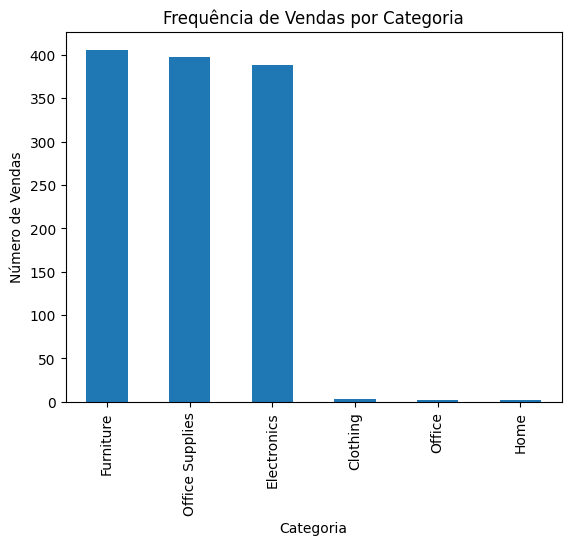

In [146]:

freq_category.plot(kind="bar")
plt.title("Frequência de Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Número de Vendas")
plt.show()


Participação percentual de cada categoria no total do valor de "Amount"

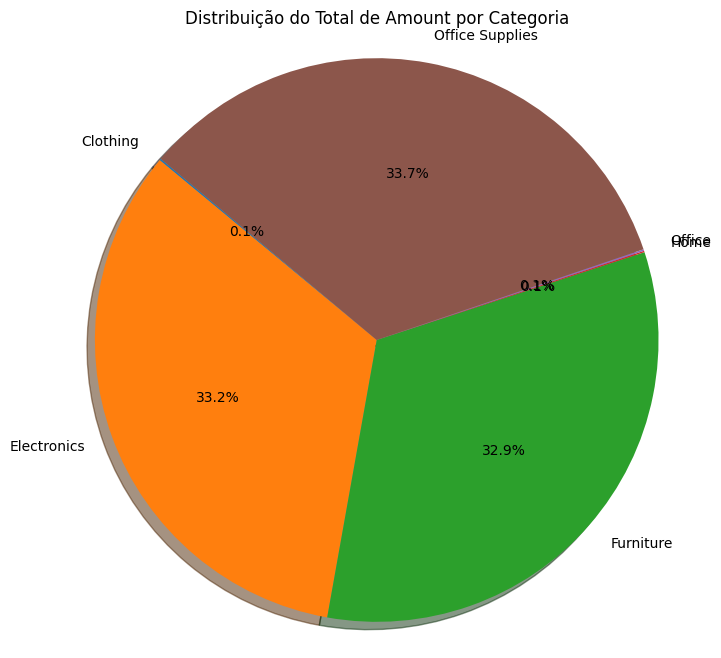

In [147]:
grouped_df = df.groupby("Category")["Amount"].sum().reset_index()

# Dados para o gráfico
labels = grouped_df["Category"]
sizes = grouped_df["Amount"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribuição do Total de Amount por Categoria")
plt.axis('equal')  
plt.show()
